Submission Dicoding Belajar Machine Learning untuk Pemula

Nama: Irsan Nur Hidayat
email: irsannur.h@gmail.com

In [1]:
#Mengimpor library yang dibutuhkan
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import zipfile,os,shutil

In [2]:
#Mengimport dataset yang akan digunakan
!wget --no-check-certificate \
  https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip \
  -o /tmp/rockpaperscissors.zip

In [3]:
#Mengekstrak dataset yang telah diimport
!unzip rockpaperscissors.zip

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM

In [4]:
#mengecek isi dari direktori hasil ekstrak data zip
base_dir = "/content/rockpaperscissors/rps-cv-images"

os.listdir(base_dir)

['paper', 'scissors', 'rock', 'README_rpc-cv-images.txt']

In [5]:
#membuat direktori
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [6]:
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [7]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
validation_rock = os.path.join(validation_dir, 'rock')
validation_paper = os.path.join(validation_dir, 'paper')
validation_scissors = os.path.join(validation_dir, 'scissors')

In [8]:
os.mkdir(train_rock)
os.mkdir(train_paper)
os.mkdir(train_scissors)
os.mkdir(validation_rock)
os.mkdir(validation_paper)
os.mkdir(validation_scissors)

In [9]:
#Split Dataset Menjadi Train dan Validation Data
train_rock_dir, validation_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.40, train_size = 0.60)
train_paper_dir, validation_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.40, train_size = 0.60)
train_scissors_dir, validation_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.40, train_size = 0.60)

In [10]:
for file in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(train_rock, file))
for file in train_paper_dir:
  shutil.copy(os.path.join(paper_dir, file), os.path.join(train_paper, file))
for file in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir, file), os.path.join(train_scissors, file))
for file in validation_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(validation_rock, file))
for file in validation_paper_dir:
  shutil.copy(os.path.join(paper_dir, file), os.path.join(validation_paper, file))
for file in validation_scissors_dir:
  shutil.copy(os.path.join(scissors_dir, file), os.path.join(validation_scissors, file))

In [11]:
#Tahap Penerapan Augmentation dan Generate Image Data
train_data_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

validation_data_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [12]:
train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

model.summary()
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [14]:
#Callback untuk mencegah overfitting dan segera menghentikan training jika akurasi telah terpenuhi
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.95):
      print("Akurasi telah berada di atas 95%. Training harus dihentikan sekarang juga.")
      self.model.stop_training = True

callbacks = myCallback()

In [15]:
hist = model.fit(
    train_generator,
    steps_per_epoch = 41,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 27,
    verbose = 2,
    callbacks = [callbacks]
)

Epoch 1/20
41/41 - 98s - loss: 1.1460 - accuracy: 0.4459 - val_loss: 0.8202 - val_accuracy: 0.6111 - 98s/epoch - 2s/step
Epoch 2/20
41/41 - 94s - loss: 0.6247 - accuracy: 0.7752 - val_loss: 0.5371 - val_accuracy: 0.8021 - 94s/epoch - 2s/step
Epoch 3/20
41/41 - 97s - loss: 0.3509 - accuracy: 0.8720 - val_loss: 0.3143 - val_accuracy: 0.8889 - 97s/epoch - 2s/step
Epoch 4/20
41/41 - 99s - loss: 0.2486 - accuracy: 0.9146 - val_loss: 0.2908 - val_accuracy: 0.9074 - 99s/epoch - 2s/step
Epoch 5/20
41/41 - 102s - loss: 0.1780 - accuracy: 0.9352 - val_loss: 0.2113 - val_accuracy: 0.9375 - 102s/epoch - 2s/step
Epoch 6/20
41/41 - 94s - loss: 0.1679 - accuracy: 0.9383 - val_loss: 0.2566 - val_accuracy: 0.9271 - 94s/epoch - 2s/step
Epoch 7/20
41/41 - 96s - loss: 0.1634 - accuracy: 0.9466 - val_loss: 0.2224 - val_accuracy: 0.9329 - 96s/epoch - 2s/step
Epoch 8/20
41/41 - 97s - loss: 0.1494 - accuracy: 0.9451 - val_loss: 0.2220 - val_accuracy: 0.9375 - 97s/epoch - 2s/step
Epoch 9/20
Akurasi telah berad

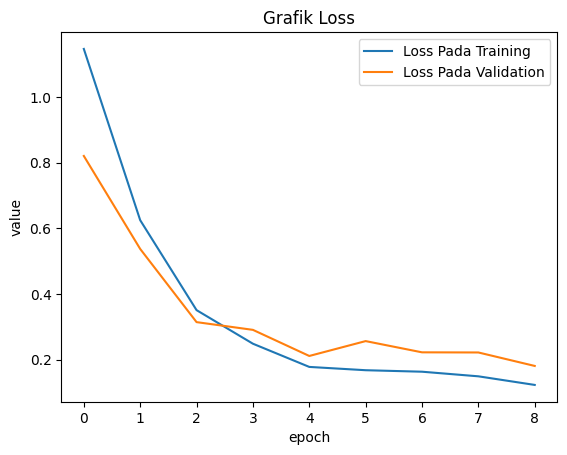

In [16]:
from matplotlib import pyplot as plt
#Melihat Loss yang terjadi pada Validation dan Training
plt.plot(hist.history['loss'], label='Loss Pada Training')
plt.plot(hist.history['val_loss'], label='Loss Pada Validation')
plt.title('Grafik Loss')
plt.ylabel('value')
plt.xlabel('epoch')
plt.legend(loc = 'upper right')
plt.show()

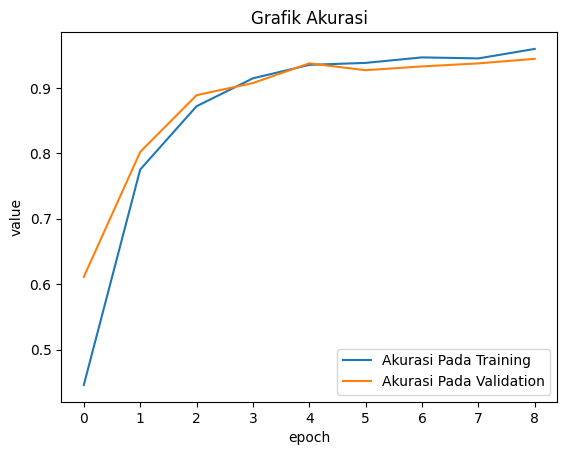

In [17]:
#Melihat akurasi selama proses train dan validasi
plt.plot(hist.history['accuracy'], label = 'Akurasi Pada Training')
plt.plot(hist.history['val_accuracy'], label = 'Akurasi Pada Validation')
plt.title('Grafik Akurasi')
plt.ylabel('value')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()

Saving IY007WkIgMgYMJRj.png to IY007WkIgMgYMJRj.png
1/1 [==============================] - 0s 225ms/step
IY007WkIgMgYMJRj.png
rock


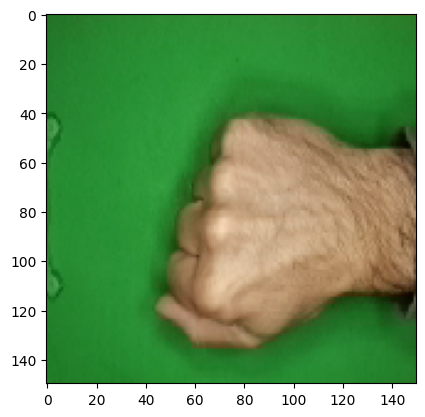

In [18]:
#pengujian model
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')